<a href="https://colab.research.google.com/github/joyangelai/Capstone-Project/blob/main/LoanDefaultersFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
#Loading the Dataset
#from google.colab import files
#uploaded = files.upload()
#Choose the dataset from File Explorer

In [ ]:
#Checking Head of the Dataset
data=pd.read_csv('/content/lending_club_loan_two 2.csv')
pd.set_option('display.max_columns', None)
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
#Viewing Basic Properties of the Data
data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [ ]:
#Checking Data Explanation
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [ ]:
#checking the shape
data.shape

(396030, 27)

In [ ]:
#Creating a copy of the data to avoid messing around
df=data.copy(deep=True)

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


# **Data Cleaning and EDA**

In [ ]:
#Checking distinct values.
for column in df:
  dvals=df[column].unique()
  print(f"Distinct values in {column} '\n': {dvals}")

Distinct values in loan_amnt '
': [10000.  8000. 15600. ... 36275. 36475.   725.]
Distinct values in term '
': [' 36 months' ' 60 months']
Distinct values in int_rate '
': [11.44 11.99 10.49  6.49 17.27 13.33  5.32 11.14 10.99 16.29 13.11 14.64
  9.17 12.29  6.62  8.39 21.98  7.9   6.97  6.99 15.61 11.36 13.35 12.12
  9.99  8.19 18.75  6.03 14.99 16.78 13.67 13.98 16.99 19.91 17.86 21.49
 12.99 18.54  7.89 17.1  18.25 11.67  6.24  8.18 12.35 14.16 17.56 18.55
 22.15 10.39 15.99 16.07 24.99  9.67 19.19 21.   12.69 10.74  6.68 19.22
 11.49 16.55 19.97 24.7  13.49 18.24 16.49 25.78 25.83 18.64  7.51 13.99
 15.22 15.31  7.69 19.53 10.16  7.62  9.75 13.68 15.88 14.65  6.92 23.83
 10.75 18.49 20.31 17.57 27.31 19.99 22.99 12.59 10.37 14.33 13.53 22.45
 24.5  17.99  9.16 12.49 11.55 17.76 28.99 23.1  20.49 22.7  10.15  6.89
 19.52  8.9  14.3   9.49 25.99 24.08 13.05 14.98 16.59 11.26 25.89 14.48
 21.99 23.99  5.99 14.47 11.53  8.67  8.59 10.64 23.28 25.44  9.71 16.2
 19.24 24.11 15.8  15.96 1

In [ ]:
#We check columns
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [ ]:
#Checking empty slots
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,22927
emp_length,18301
home_ownership,0
annual_inc,0


In [ ]:
# 1. Drop 'emp_title' and 'title' because they won't be of use in our case.
df = df.drop(['emp_title', 'title'], axis=1)

# 2. Fill emp_length empty slots with Unknown
df['emp_length'] = df['emp_length'].fillna('Unknown')

# 3. Fill revol_util empty slots with the median
df['revol_util'] = df['revol_util'].fillna(df['revol_util'].median())

# 4. Fill mort_acc empty slots with median
df['mort_acc'] = df['mort_acc'].fillna(df['mort_acc'].median())

# 5. Fill pub_rec_bankruptcies empty slots with the mode value
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(
    df['pub_rec_bankruptcies'].mode()[0]
)

# 6. Double check.
print(df.isnull().sum())




loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64


We had empty slots in emp_title, emp_length, title, revol_util, mort_acc and pub_rec_bankruptcies but we've dealt with them.

In [ ]:
#checking the shape of the dataset
df.shape

(396030, 25)

In [ ]:
#Checking duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
#Checking and getting rid of outliers
#Outliers only exist in columns with numeric info
#Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

#Loop through numeric columns and check outliers
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    interquartile_range = Q3 - Q1
    lower_bound = Q1 - 1.5 * interquartile_range
    upper_bound = Q3 + 1.5 * interquartile_range
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")


loan_amnt: 191 outliers
int_rate: 3777 outliers
installment: 11250 outliers
annual_inc: 16700 outliers
dti: 275 outliers
open_acc: 10307 outliers
pub_rec: 57758 outliers
revol_bal: 21259 outliers
revol_util: 12 outliers
total_acc: 8499 outliers
mort_acc: 6843 outliers
pub_rec_bankruptcies: 45115 outliers


In [ ]:
# Step 1: Make a copy of the original
final_data = df.copy()

# Step 2: Remove outliers from inconsequential columns
remove_cols = ['open_acc', 'pub_rec', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']

for col in remove_cols:
    Q1 = final_data[col].quantile(0.25)
    Q3 = final_data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    before = final_data.shape[0]
    final_data = final_data[(final_data[col] >= lower_bound) & (final_data[col] <= upper_bound)]
    after = final_data.shape[0]

    print(f"{col}: Removed {before - after} rows → Remaining: {after}")

print("\nAfter removing inconsequential outliers:", final_data.shape)

# Step 3: Cap consequential columns
cap_cols = ['loan_amnt', 'int_rate', 'installment', 'annual_inc',
            'dti', 'revol_bal', 'revol_util']

for col in cap_cols:
    Q1 = final_data[col].quantile(0.25)
    Q3 = final_data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    before_max = final_data[col].max()
    before_min = final_data[col].min()

    final_data[col] = final_data[col].clip(lower=lower_bound, upper=upper_bound)

    after_max = final_data[col].max()
    after_min = final_data[col].min()

    print(f"{col}: capped min {before_min:.2f} → {after_min:.2f}, max {before_max:.2f} → {after_max:.2f}")

# Step 4: Optional sanity filter
final_data = final_data[final_data['annual_inc'] <= 1_000_000]

print("\nFinal dataset size after all cleaning:", final_data.shape)


open_acc: Removed 10307 rows → Remaining: 385723
pub_rec: Removed 56489 rows → Remaining: 329234
total_acc: Removed 4939 rows → Remaining: 324295
mort_acc: Removed 5113 rows → Remaining: 319182
pub_rec_bankruptcies: Removed 0 rows → Remaining: 319182

After removing inconsequential outliers: (319182, 25)
loan_amnt: capped min 500.00 → 500.00, max 40000.00 → 38000.00
int_rate: capped min 5.32 → 5.32, max 30.99 → 25.50
installment: capped min 16.08 → 16.08, max 1527.00 → 1058.55
annual_inc: capped min 0.00 → 0.00, max 8706582.00 → 155000.00
dti: capped min 0.00 → 0.00, max 9999.00 → 40.39
revol_bal: capped min 0.00 → 0.00, max 1298783.00 → 41387.00
revol_util: capped min 0.00 → 0.00, max 892.30 → 130.60

Final dataset size after all cleaning: (319182, 25)


In [ ]:
final_data.shape

(319182, 25)

In [ ]:
#Check for nulls
final_data.isnull().sum()


,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_length,0
home_ownership,0
annual_inc,0
verification_status,0


# **Now we can do EDA**




In [ ]:
#For easy typing, We do
df2 = final_data.copy()

In [ ]:
#Just Confirming
df2.info()
df2.describe().T
df2.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
Index: 319182 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             319182 non-null  float64
 1   term                  319182 non-null  object 
 2   int_rate              319182 non-null  float64
 3   installment           319182 non-null  float64
 4   grade                 319182 non-null  object 
 5   sub_grade             319182 non-null  object 
 6   emp_length            319182 non-null  object 
 7   home_ownership        319182 non-null  object 
 8   annual_inc            319182 non-null  float64
 9   verification_status   319182 non-null  object 
 10  issue_d               319182 non-null  object 
 11  loan_status           319182 non-null  object 
 12  purpose               319182 non-null  object 
 13  dti                   319182 non-null  float64
 14  earliest_cr_line      319182 non-null  object 
 15  open_

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_length,0
home_ownership,0
annual_inc,0
verification_status,0


In [ ]:
#shape
df2.shape

(319182, 25)

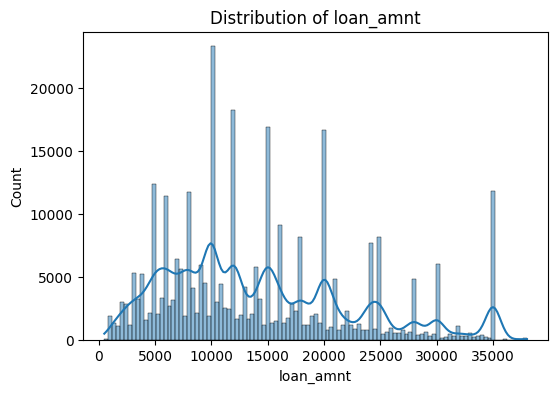

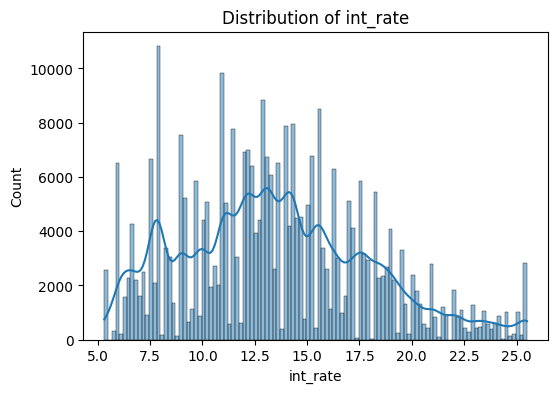

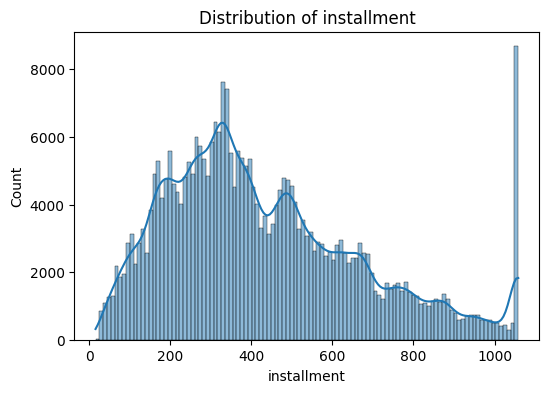

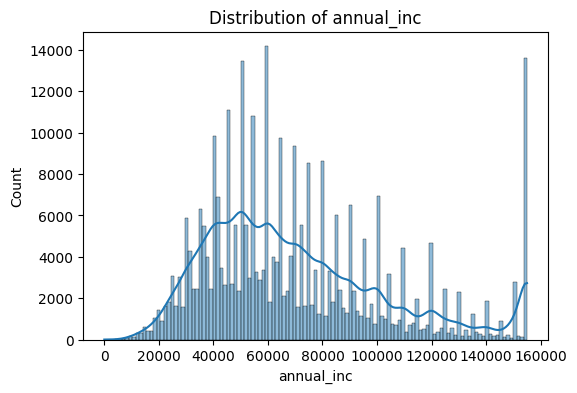

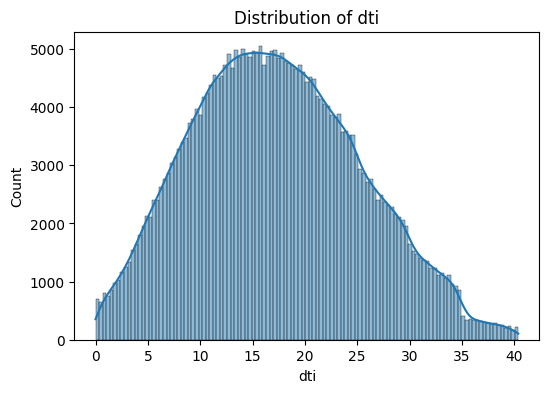

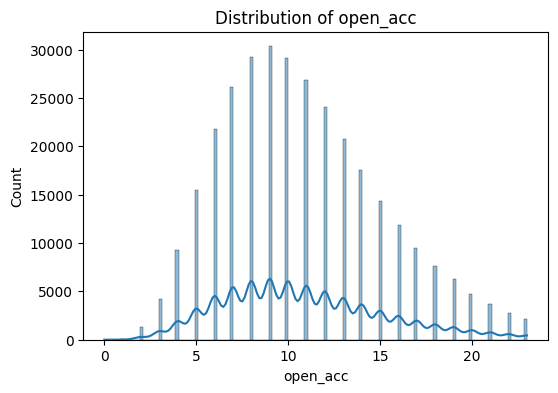

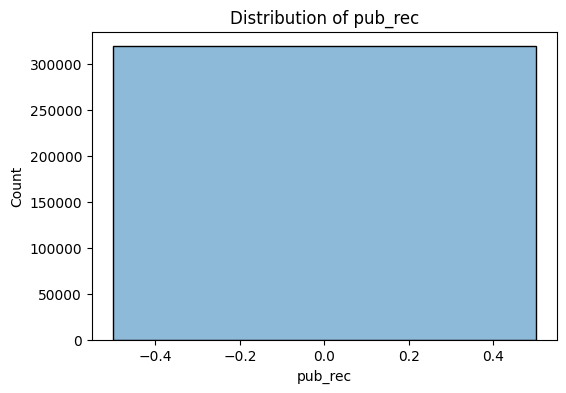

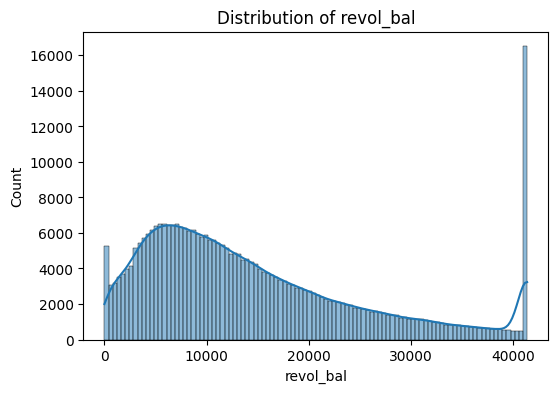

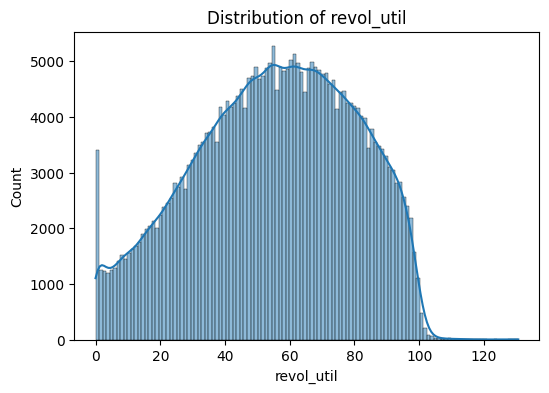

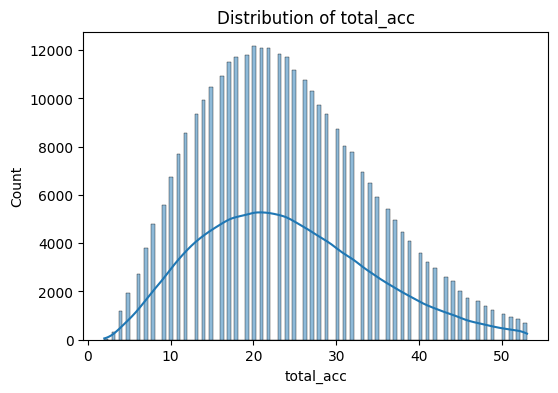

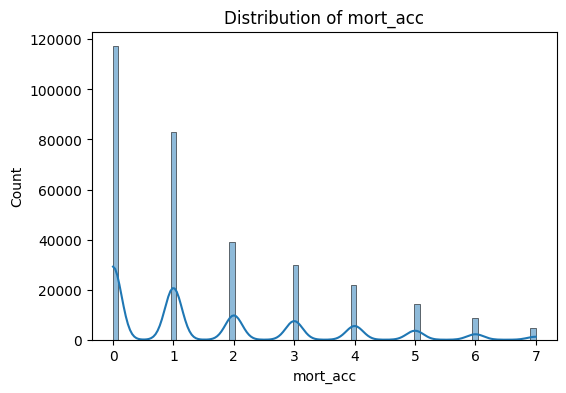

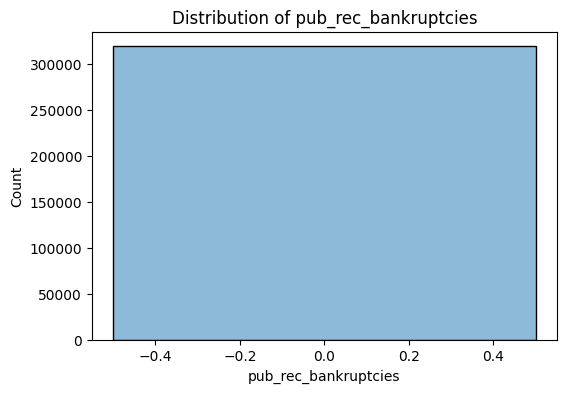

In [ ]:
#Checking for Residual Outliers
num_cols = df2.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df2[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


Everything is okay

In [ ]:
#Summary stats
df2.describe().T


,count,mean,std,min,25%,50%,75%,max
loan_amnt,319182.0,14252.981919,8380.175207,500.00,8000.00,12000.00,20000.00,38000.000
int_rate,319182.0,13.496442,4.474177,5.32,10.15,13.11,16.29,25.500
installment,319182.0,432.194050,242.075980,16.08,252.43,381.04,574.88,1058.555
annual_inc,319182.0,70295.113949,33780.839654,0.00,45000.00,63000.00,89000.00,155000.000
dti,319182.0,17.325016,8.078942,0.00,11.31,16.91,22.94,40.385
open_acc,319182.0,10.797683,4.359800,0.00,8.00,10.00,14.00,23.000
pub_rec,319182.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000
revol_bal,319182.0,14745.008274,10933.228292,0.00,6417.00,11856.00,20405.00,41387.000
revol_util,319182.0,54.997152,24.652421,0.00,37.10,56.40,74.50,130.600
total_acc,319182.0,23.859980,10.248978,2.00,16.00,23.00,31.00,53.000


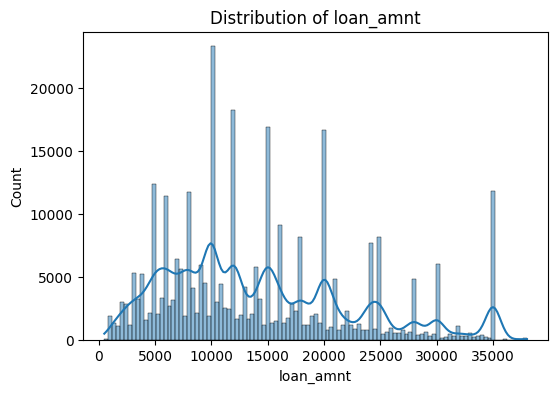

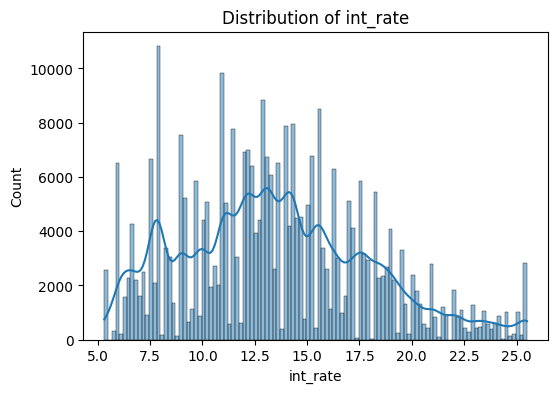

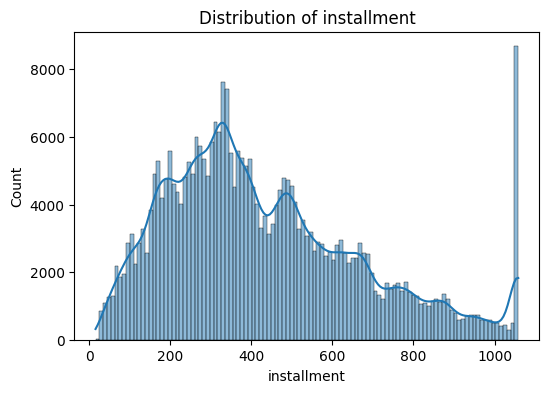

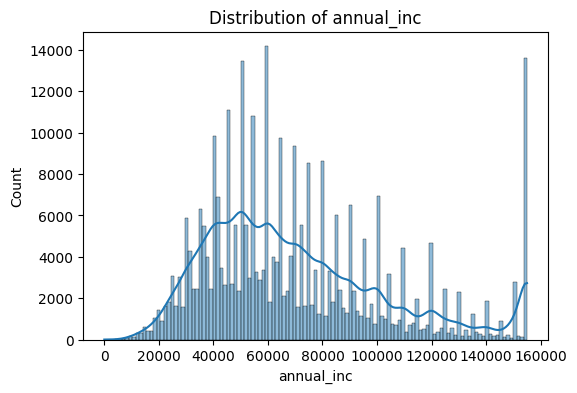

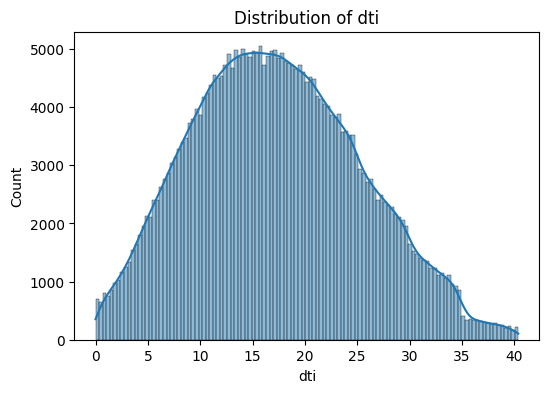

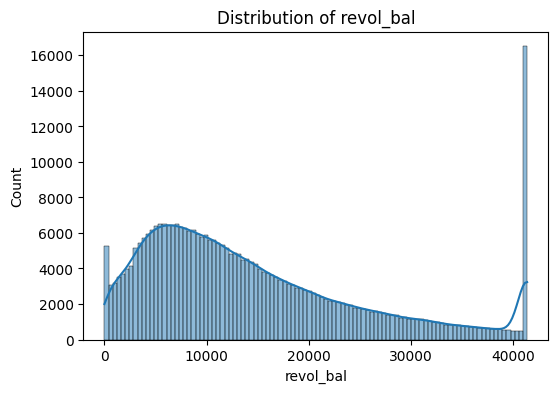

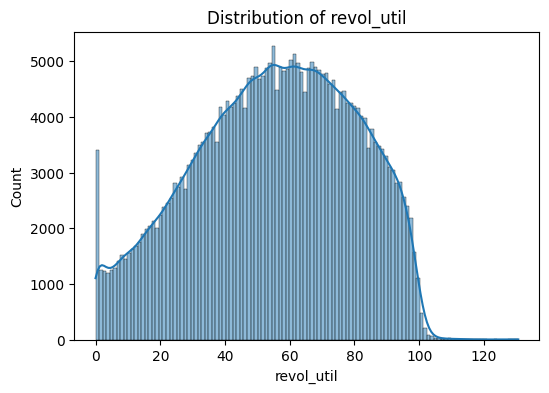

In [ ]:
#Correlation in numerical vars
for col in cap_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df2[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


We can see that all the numerical values reach their peak around a certain median.

In [ ]:
#Comparing default_flag to loan_status
df2['default_flag'] = df2['loan_status'].apply(lambda x: 1 if x in ['Charged Off','Default'] else 0)
df2['default_flag'].value_counts(normalize=True)


,proportion
default_flag,
0,0.806534
1,0.193466


We can observe that 19% of loans in this dataset default.

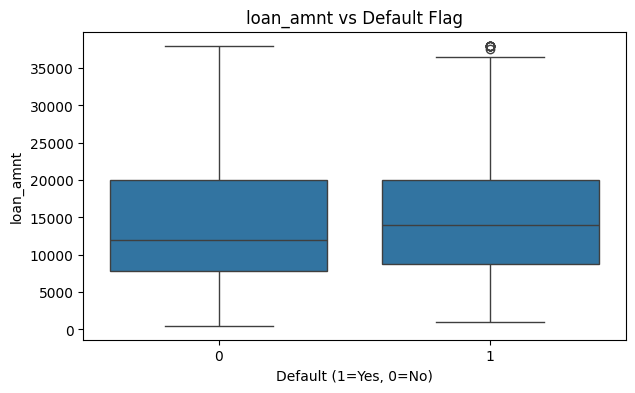

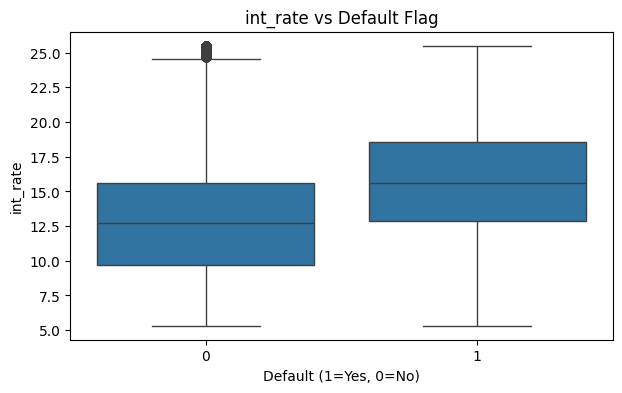

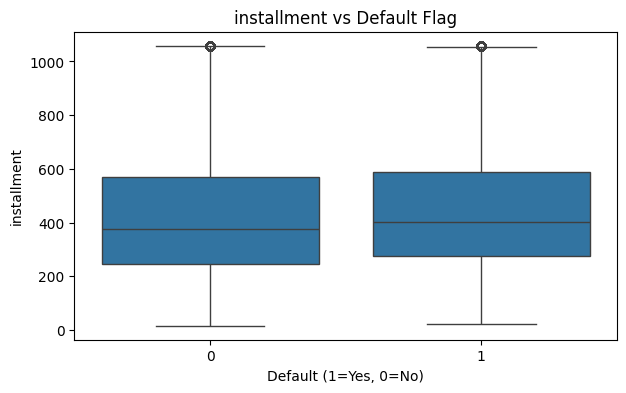

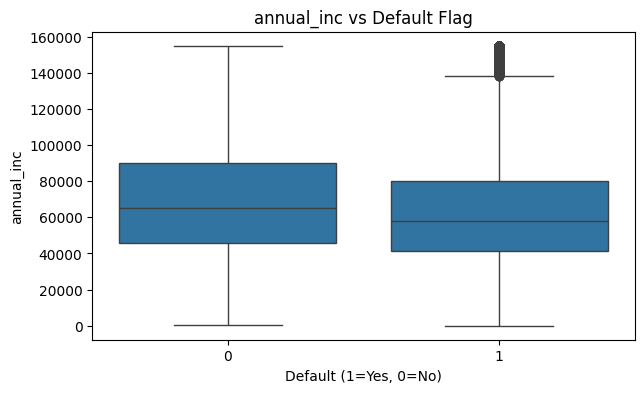

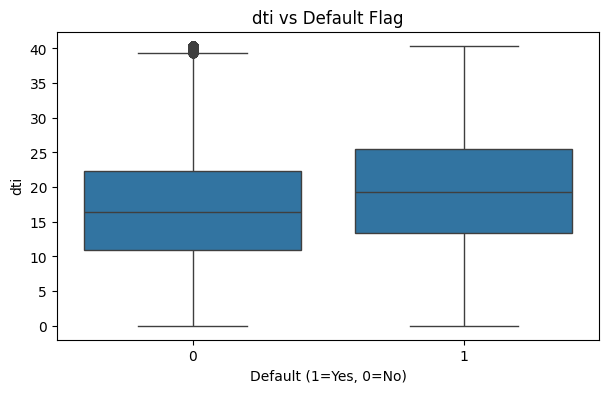

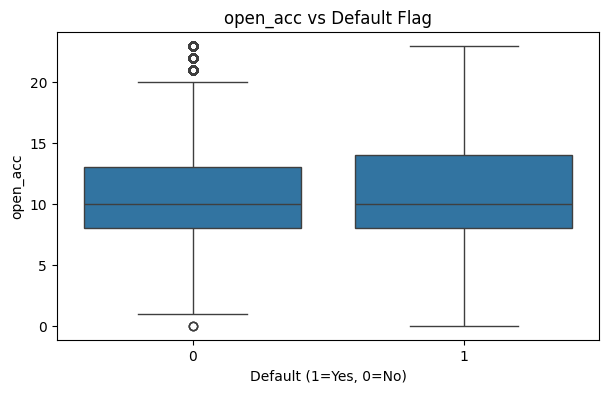

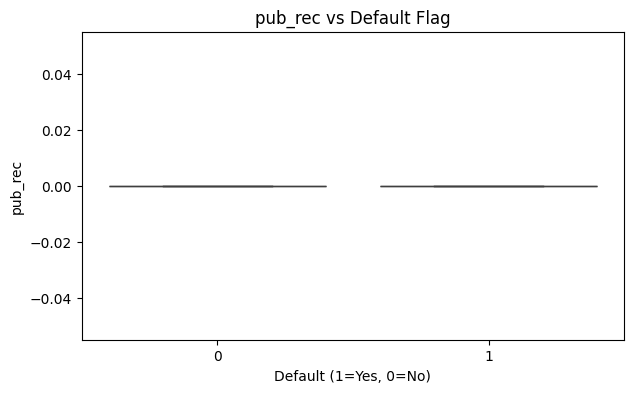

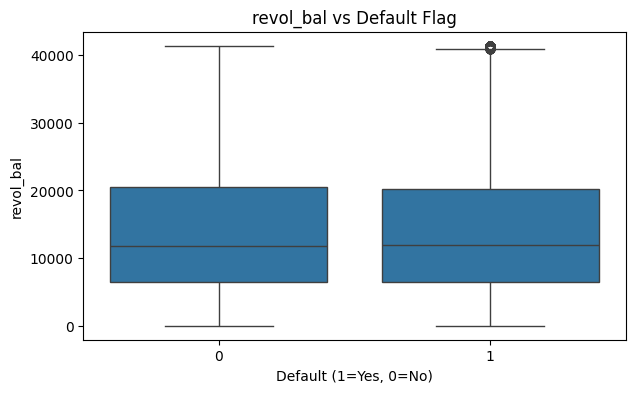

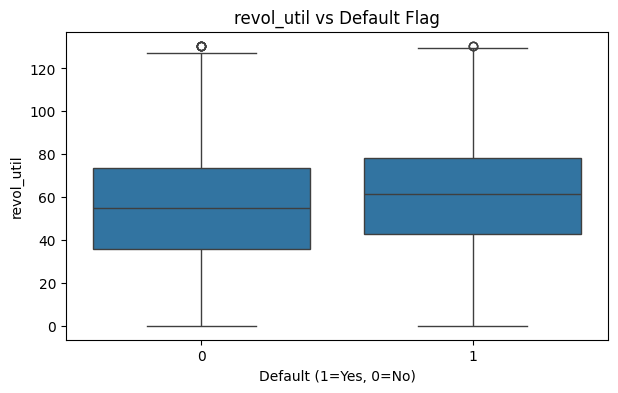

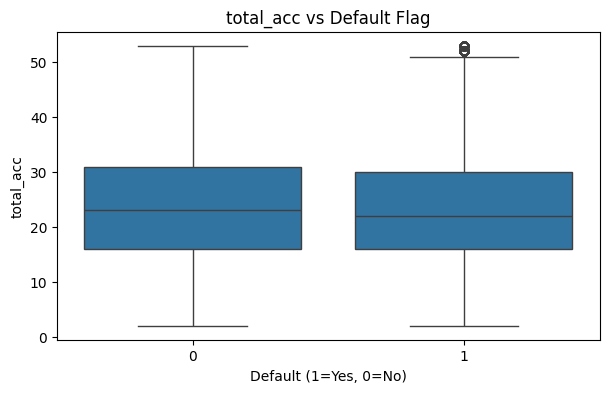

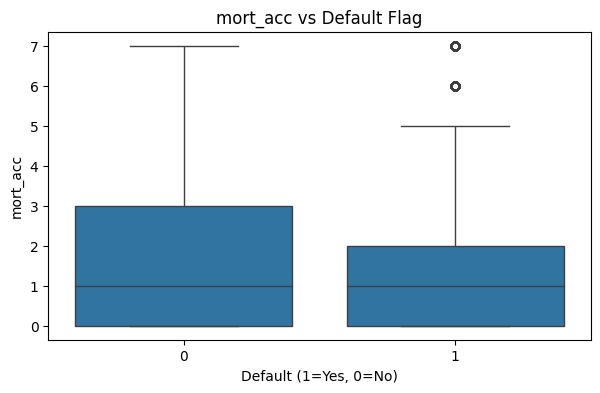

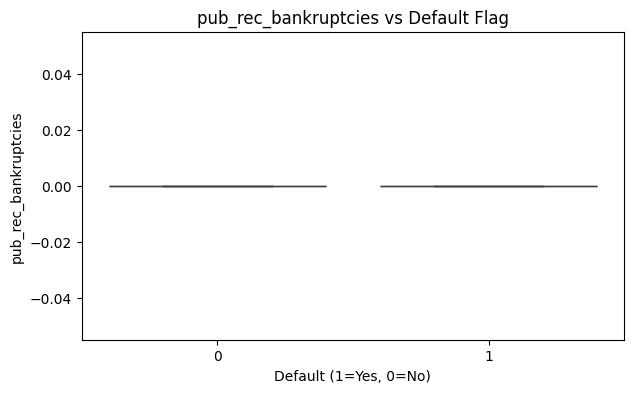

In [ ]:
#Numerical Values versus Default
num_cols = df2.select_dtypes(include=['int64','float64']).columns.drop('default_flag')

for col in num_cols:
    plt.figure(figsize=(7,4))
    sns.boxplot(x='default_flag', y=col, data=df2)
    plt.title(f"{col} vs Default Flag")
    plt.xlabel("Default (1=Yes, 0=No)")
    plt.show()


# Observations

1. We can see that the higher the loan amount the higher the probability for defaulting.
2. We also see that People with open accounts hardly default on loans.   
3. We see that people with low annual incomes default on loans.
4. We can see that Higher Debt to Income (DTI) Ratio equals to more defaulting on loans.



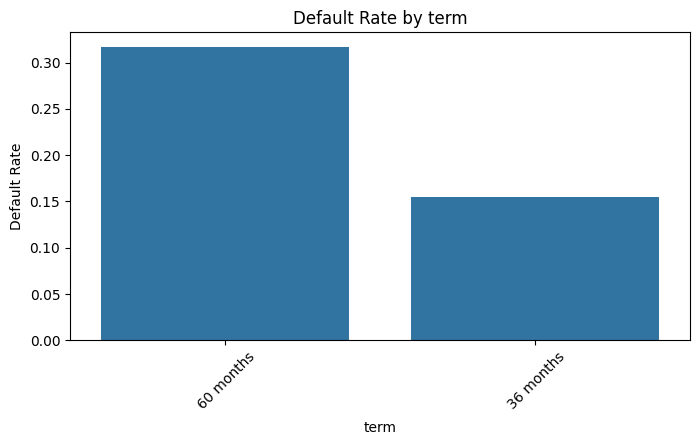

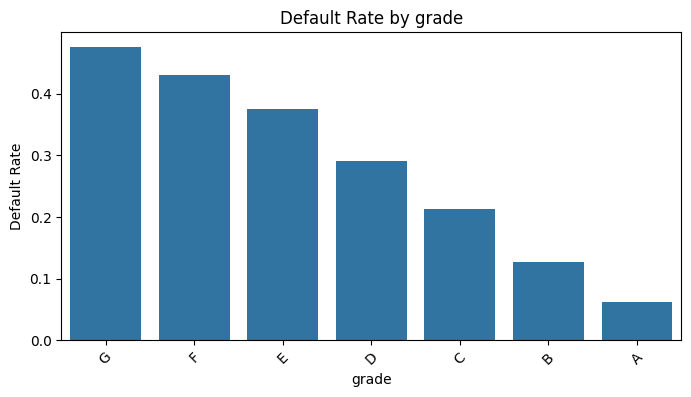

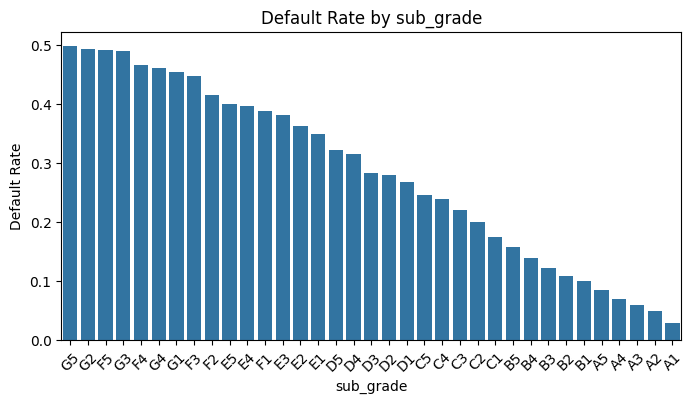

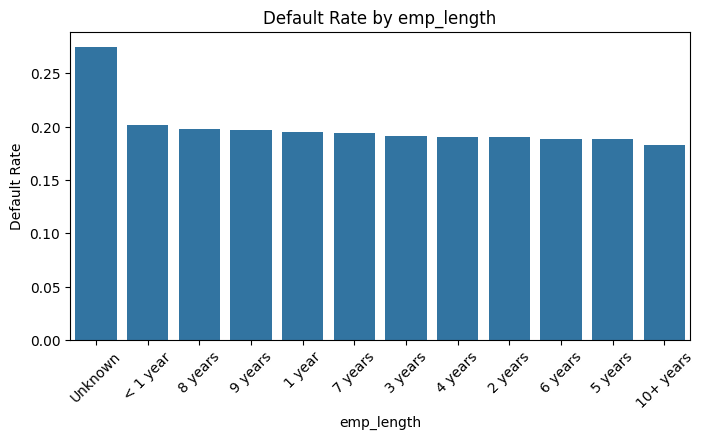

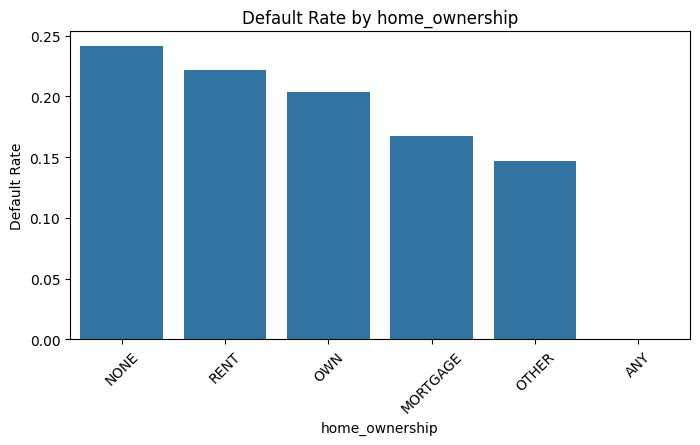

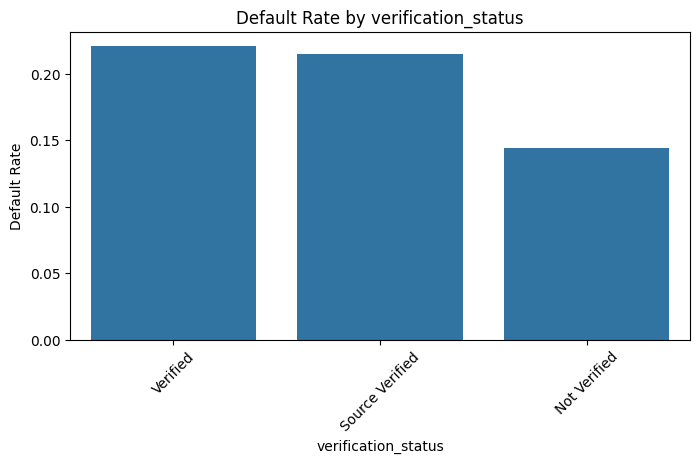

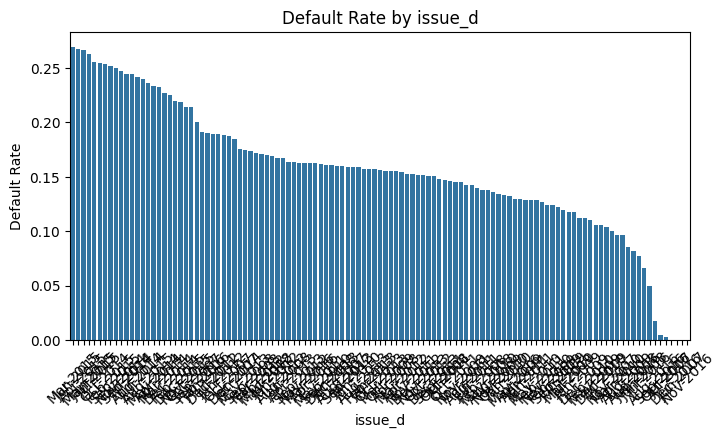

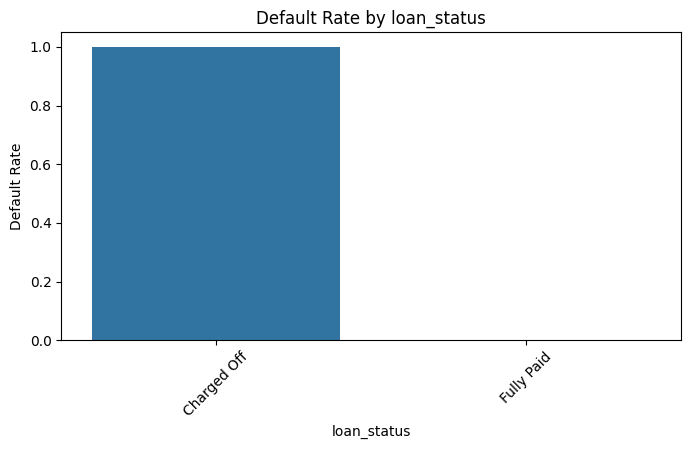

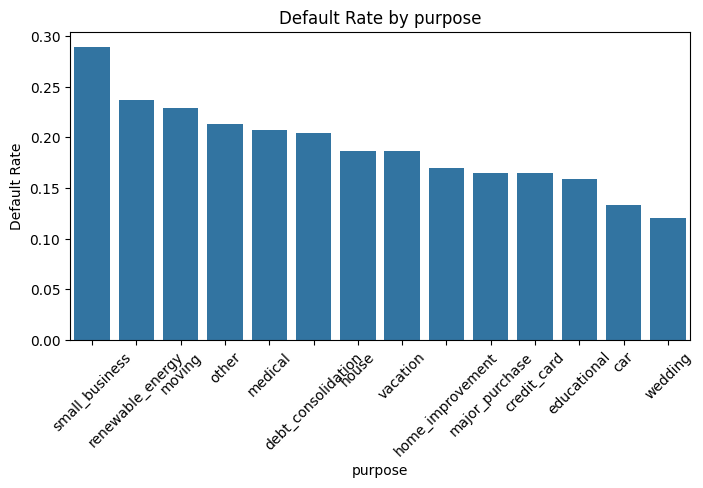

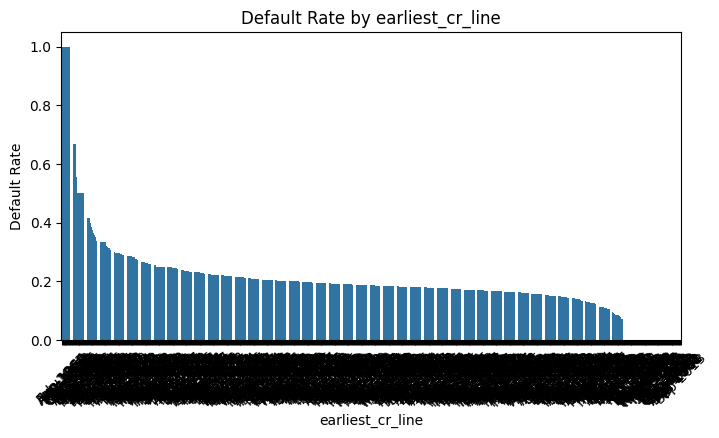

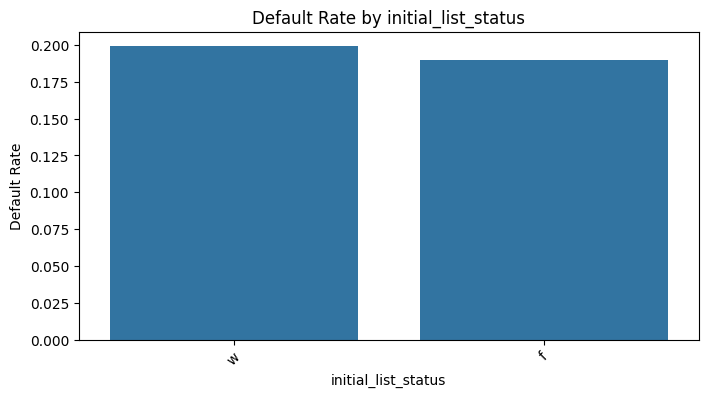

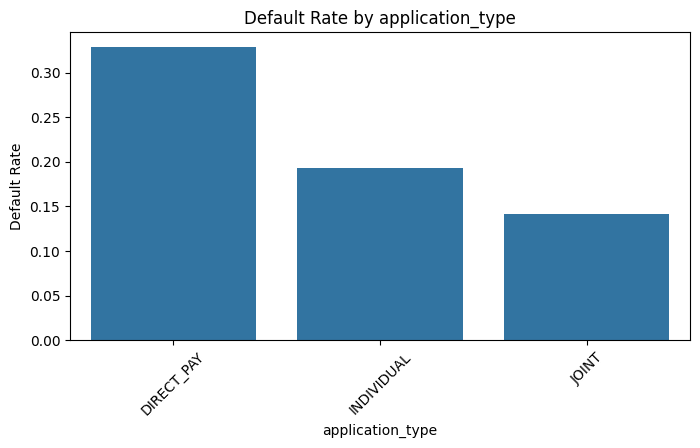

In [ ]:
#Categorical features VS Defaulting
cat_cols = df2.select_dtypes(include='object').columns

for col in cat_cols:
    plt.figure(figsize=(8,4))
    default_rates = df2.groupby(col)['default_flag'].mean().sort_values(ascending=False)
    sns.barplot(x=default_rates.index, y=default_rates.values)
    plt.title(f"Default Rate by {col}")
    plt.xticks(rotation=45)
    plt.ylabel("Default Rate")
    plt.show()


# Observations
1. Grades D, E, F, G have higher default rates than A, B, C.
2. People with No Homes and Rent Homes default more on loans than Mortgage Homes and People who own homes.
3. People with Unknown an less than a year employment lengths default on loans more than people with longer employment lengths like 10+ years.
4. People starting small businesses or more risk-based causes default more than people with less risky ventures such as weddings, cars and educational loans.

In [ ]:
df2.sample(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,default_flag
205880,28625.0,60 months,24.70,835.16,G,G1,10+ years,RENT,64000.0,Verified,May-2013,Fully Paid,debt_consolidation,27.34,Oct-1999,8.0,0.0,19093.0,75.2,25.0,w,INDIVIDUAL,1.0,0.0,"4213 Stephanie Green\r\nMartinville, NE 70466",0
394067,10000.0,36 months,15.59,349.55,D,D1,< 1 year,RENT,49000.0,Source Verified,Jan-2015,Charged Off,other,35.00,May-2009,11.0,0.0,6498.0,45.1,15.0,f,INDIVIDUAL,0.0,0.0,USCGC Barker\r\nFPO AE 70466,1
261360,28000.0,36 months,8.39,882.47,A,A5,2 years,MORTGAGE,125000.0,Source Verified,Jun-2014,Fully Paid,debt_consolidation,11.24,Jun-1995,9.0,0.0,41387.0,43.0,17.0,w,INDIVIDUAL,4.0,0.0,"8769 Jeffery Ridge Apt. 796\r\nDanielstad, KY ...",0
179183,20000.0,36 months,6.62,614.08,A,A2,10+ years,RENT,46000.0,Verified,Aug-2013,Fully Paid,debt_consolidation,27.37,Sep-1983,8.0,0.0,5865.0,18.0,21.0,w,INDIVIDUAL,1.0,0.0,"071 Jennifer Stream\r\nNicholaschester, DE 48052",0
377703,3000.0,36 months,9.99,96.79,B,B3,10+ years,MORTGAGE,60000.0,Not Verified,May-2015,Fully Paid,debt_consolidation,32.84,Aug-2001,13.0,0.0,5779.0,17.4,23.0,w,INDIVIDUAL,3.0,0.0,"51254 Michael Forest\r\nPachecoview, UT 30723",0


MODELLING

In [ ]:
#importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score,accuracy_score, classification_report, roc_curve, confusion_matrix


In [ ]:
#confirming the shape of the dataset
df2.shape

(319182, 26)

In [ ]:
df2.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,default_flag
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",0
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",0
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",0


In [ ]:
#removing column that won't affect defaulting
df2 = df2.drop(['issue_d', 'earliest_cr_line','address'], axis=1)

In [ ]:
#confirming the shape
df2.shape

(319182, 23)

In [ ]:
#converting non_numerical data to numerical data
df2_dummy = pd.get_dummies(df2[['initial_list_status','grade','term','sub_grade','emp_length', 'home_ownership','verification_status','purpose','application_type']], drop_first=True, dtype='int')

In [ ]:
#shape
df2_dummy.shape

(319182, 75)

In [ ]:
df2_dummy.head(3)

,initial_list_status_w,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,term_ 60 months,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,emp_length_Unknown,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_INDIVIDUAL,application_type_JOINT
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
#merging the encoded data to the original dataset

df2_merged = pd.concat([df2_dummy, df2], axis=1)

df2_merged.head(3)

,initial_list_status_w,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,term_ 60 months,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,emp_length_Unknown,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_INDIVIDUAL,application_type_JOINT,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,default_flag
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,Fully Paid,vacation,26.24,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,Fully Paid,debt_consolidation,22.05,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,Fully Paid,credit_card,12.79,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,0


In [ ]:
#shape
df2_merged.shape


(319182, 98)

In [ ]:
#dropping original columns
df2_merged = df2_merged.drop(['initial_list_status','loan_status','grade','term','sub_grade','emp_length', 'home_ownership', 'verification_status','purpose', 'application_type'], axis=1)

df2_merged.head(3)

,initial_list_status_w,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,term_ 60 months,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,emp_length_Unknown,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_INDIVIDUAL,application_type_JOINT,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,default_flag
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,0


In [ ]:
#confirming the shape of dataset
df2_merged.shape

(319182, 88)

In [ ]:
# check the dataset again
df2_merged.sample(5)

,initial_list_status_w,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,term_ 60 months,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,emp_length_Unknown,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_INDIVIDUAL,application_type_JOINT,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,default_flag
345460,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,32000.0,14.64,1058.555,90000.0,9.16,13.0,0.0,3011.0,8.8,41.0,1.0,0.0,0
244931,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,5500.0,10.16,177.890,43000.0,32.26,19.0,0.0,20457.0,77.5,35.0,0.0,0.0,0
125759,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,7300.0,14.49,251.240,22100.0,34.38,7.0,0.0,7655.0,63.8,8.0,0.0,0.0,0
1042,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,15000.0,15.81,525.950,46706.0,14.67,13.0,0.0,9224.0,77.5,25.0,0.0,0.0,0
74431,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,18000.0,14.99,623.890,41000.0,18.68,17.0,0.0,21291.0,58.2,22.0,0.0,0.0,0


In [ ]:
#splitting target from the features

x = df2_merged.drop('default_flag', axis=1)
y = df2_merged['default_flag']

x.shape, y.shape

((319182, 87), (319182,))

In [ ]:
#splitting features for training
#importing the model
from sklearn.model_selection import train_test_split

#splitting
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [ ]:
#checking the shape of the split data
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((223427, 87), (223427,), (95755, 87), (95755,))

In [ ]:
#importing scaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# select the necessary features for deployment
selected_feat = ['loan_amnt','installment', 'int_rate', 'annual_inc', 'dti']
X_train_select = x_train[selected_feat]


#Scaling the features --> original
scl = StandardScaler()
x_train_s = scl.fit_transform(x_train)
x_test_s = scl.transform(x_test)

#deployed
scale = StandardScaler()
X_train_sc = scale.fit_transform(X_train_select)

LOGISTIC REGRESSION MODEL

In [ ]:
#creating and training the model
model1 = LogisticRegression()
model1.fit(x_train_s, y_train)

LogisticRegression()

In [ ]:
#predict the model
y_pred = model1.predict(x_test_s)

In [ ]:
#check the acccuracy
print(f'The accuracy score is {accuracy_score(y_test, y_pred)*100:.2f}%')

The accuracy score is 80.83%


In [ ]:
#confusion matrix
confusion_matrix(y_test, y_pred)

array([[76307,   942],
       [17414,  1092]])

In [ ]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89     77249
           1       0.54      0.06      0.11     18506

    accuracy                           0.81     95755
   macro avg       0.68      0.52      0.50     95755
weighted avg       0.76      0.81      0.74     95755



In [ ]:
# deploy model
modela = LogisticRegression()
modela.fit(X_train_sc, y_train)

print(f'The accuracy score is {accuracy_score(y_test, y_pred)*100:.2f}%')

The accuracy score is 80.83%


XGBOOST

In [ ]:
#call  xgboost classifier
from xgboost import XGBClassifier

#creating the model
model4 = XGBClassifier()

#training the model
model4.fit(x_train_s,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
#pedicting the model
y_pred2 = model4.predict(x_test_s)

In [ ]:
#finding the accuracy score
print(f'The accuracy score is {accuracy_score(y_test, y_pred2)*100:.2f}%')

The accuracy score is 80.80%


In [ ]:
#confusion matrix
confusion_matrix(y_test, y_pred2)

array([[75569,  1680],
       [16702,  1804]])

In [ ]:
#classification report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89     77249
           1       0.52      0.10      0.16     18506

    accuracy                           0.81     95755
   macro avg       0.67      0.54      0.53     95755
weighted avg       0.76      0.81      0.75     95755



In [ ]:
# Check for overfitting
train_acc = accuracy_score(y_train, model4.predict(x_train_s))
test_acc = accuracy_score(y_test, model4.predict(x_test))

print(f"Training Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")

if train_acc > test_acc + 0.1:
    print('Model might be overfitting.')

Training Accuracy: 0.82
Test Accuracy: 0.81


In [ ]:
# deployed
modelb = XGBClassifier()
modelb.fit(X_train_sc, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

RANDOM FOREST MODEL

In [ ]:
#creating and training the model
model3 = RandomForestClassifier()
model3.fit(x_train_s, y_train)

RandomForestClassifier()

In [ ]:
#getting the prediction
y_pred3 = model3.predict(x_test_s)

In [ ]:
#getting the model accuracy
print(f'The accuracy score is :{accuracy_score(y_test, y_pred)*100:.2f}%')

The accuracy score is :80.83%


In [ ]:
#confusion matrix
confusion_matrix(y_test, y_pred)

array([[76307,   942],
       [17414,  1092]])

In [ ]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89     77249
           1       0.54      0.06      0.11     18506

    accuracy                           0.81     95755
   macro avg       0.68      0.52      0.50     95755
weighted avg       0.76      0.81      0.74     95755



In [ ]:
# deployed
modelc = RandomForestClassifier()
modelc.fit(X_train_sc, y_train)

RandomForestClassifier()

# DEPLOYMENT

In [ ]:
import pickle

# Save model
with open('lgmodel.pkl', 'wb') as f:
    pickle.dump(modela, f)
with open('xgmodel.pkl','wb') as f:
  pickle.dump(modelb, f)
with open('rfmodel.pkl', 'wb') as f:
  pickle.dump(modelc, f)

# Save scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scale, f)
